In [1]:
from ligo import em_bright
from ligo.em_bright import em_bright
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import time

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
def gaussian_distribution(M_injection, sigma):
    M_recovered = np.random.normal(M_injection, sigma)
    M_recovered = np.array([M_recovered])
    return M_recovered
#this function would take in a random mass generated by var s, that will get put into the gaussian dist function
#with a predefined sigma 0.001
#a new variable mass_injections is run through a loop to iterate for every mass_inj (randomly produced), an array
#of the same length will iterate. so bascially for every mass produced, there is a recovered mass by the
#np.random.normal into M_recovered with the same sigma and that is 1 injection. we want 10,000 of these.

In [3]:
M_inj = 10 + (20 - 10)*np.random.random(100000)
print(M_inj)
#sigma = 0.001
#M_recovered1_10k = [gaussian_distribution(M_inj1, sigma) for _ in range(10000)]
#print(len(M_recovered1_10k))
#print(M_recovered1_10k)
M_recovered_values = M_inj + 5
print(M_recovered_values)
print(len(M_recovered_values))

[13.82369807 16.02934514 10.77397916 ... 14.50519988 11.58724415
 15.50023594]
[18.82369807 21.02934514 15.77397916 ... 19.50519988 16.58724415
 20.50023594]
100000


/var/folders/hw/r_q5t6hd2r71fj7t3zwm74kc0000gn/T/ipykernel_8725/718971543.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


[23.16515901 18.80296141 20.21411397 ... 17.3953354  17.82164227
 17.95321595]
[[18.16515119]
 [13.80280577]
 [15.21409164]
 ...
 [12.39530462]
 [12.82165583]
 [12.95317667]]
7.2924840450286865


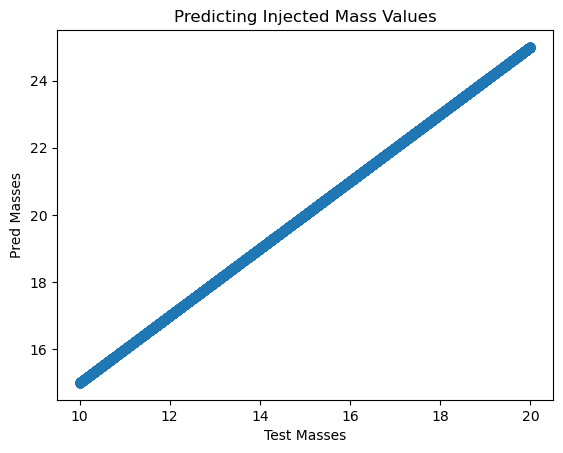

20.043677251421542 average true mass prediction
15.014170140330403 avg mass injected
133.49840226987368 % accuracy between the predicted injected mass and actual random injected mass based on recovered


In [8]:
st1 = time.time()
M_inj = M_inj.reshape(-1, 1)
M_recovered_values = M_recovered_values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(M_inj, M_recovered_values, test_size=0.20, random_state=42)
RandomForestRegressionModel = RandomForestRegressor()
RandomForestRegressionModel.fit(X_train, y_train)
y_pred = RandomForestRegressionModel.predict(X_test)
print(y_pred)
print(X_test)
et1 = time.time()
dt = et1 - st1
print(dt)
df1 = pd.DataFrame(data=np.column_stack((X_test, y_pred)),columns=['y_test','y_pred'])
df1
df1.corr()
plt.scatter(X_test, y_pred)
plt.xlabel('Test Masses')
plt.ylabel('Pred Masses')
plt.title("Predicting Injected Mass Values")
#plt.plot(X_test, y_pred, color='k')
plt.show()
mean_y_pred = np.mean(y_pred)
print(mean_y_pred, 'average true mass prediction')
print(np.mean(M_inj), 'avg mass injected')
error = ((((mean_y_pred) - np.mean(M_inj)) / np.mean(M_inj)) * 100) + 100
print(error, '% accuracy between the predicted injected mass and actual random injected mass based on recovered')